### Porting to Google Colab
The following cell enables this notebook to run from Google Colab as well as from your local machine IDE.<br>
You can change `root_directory` and/or `this_notebook_google_path` to point to the directory in your Google account, which contains this notebook, together with the `imgs` sub-directory and the rest of the files.<br>

In [1]:
import sys
import os
try:
    from google.colab import drive as google_drive # type: ignore
except:
    # no Google Colab --> fall back to local machine
    google_drive = None

if google_drive is not None:
    google_drive_directory = os.path.join('/','content','gdrive')
    google_drive.mount(google_drive_directory)
    all_projects_path = os.path.join(google_drive_directory, 'Othercomputers','My Laptop', 'projects')
else:
    all_projects_path = os.path.join('d:\\', 'projects')

project_path = os.path.join(all_projects_path,'RUNI','Thesis')
assert os.path.exists(project_path), f'Project path {project_path} not found!'
# enable import python files from this notebook's path
sys.path.append(project_path)
# enable reading images and data files from this notebook's path
os.chdir(project_path)

datasets_path = os.path.join(project_path, 'datasets')
assert os.path.exists(datasets_path), f'Datasets path {datasets_path} not found!'

output_path = os.path.join(project_path, 'output')
os.makedirs(output_path, exist_ok=True)
assert os.path.exists(output_path), f'Output path {output_path} not found!'

print(f'Current working directory: {os.getcwd()}')
print(f'Datasets path: {datasets_path}')
print(f'Output path: {output_path}')

Current working directory: d:\projects\RUNI\Thesis
Datasets path: d:\projects\RUNI\Thesis\datasets
Output path: d:\projects\RUNI\Thesis\output


In [2]:
from python.hpc import HybridArray

Numba version: 0.60.0
numba.njit is available.
CUDA is available and will be used for GPU operations.
Printing CUDA active device attributes:
    Name:                               NVIDIA GeForce GTX 1650
    Free Memory:                        3367680 [KB]
    Total Memory:                       4193984 [KB]
    Compute capability:                 7.5
    Clock rate:                         1560.00 [MHz]
    Memory clock rate:                  4001.00 [MHz]
    Memory bus width:                   128 bits
    Memory band width (theoretical)     128.03 [GByte/Sec]
    Number of multiprocessors:          16
    Minimal grid size:                  128
    Maximum grid size:                  (2147483647, 65535, 65535)
    Maximum block dimensions:           (1024, 1024, 64)
    Maximum threads per block:          1024
    Warp size:                          32
    Maximum shared memory per block:    49152 [bytes]
    Maximum registers per block:        65536
    Total constant memory:   

In [3]:
import numpy as np
from python.analysis.analysis import multi_heatmap_auc_vs_r_beta_range

Compiling Berk Jones for CUDA...
Compiling Berk Jones for CUDA... Done!


In [4]:
N = 10000
num_monte = 10000
num_r = 21
num_beta = 21
r_range = np.linspace(1.0/num_r, 1.0, num_r)
beta_range = np.linspace(0.5,1.0,num_beta)
alpha = 0.1
print(f'{r_range=}')
print(f'{beta_range=}')

r_range=array([0.04761905, 0.0952381 , 0.14285714, 0.19047619, 0.23809524,
       0.28571429, 0.33333333, 0.38095238, 0.42857143, 0.47619048,
       0.52380952, 0.57142857, 0.61904762, 0.66666667, 0.71428571,
       0.76190476, 0.80952381, 0.85714286, 0.9047619 , 0.95238095,
       1.        ])
beta_range=array([0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  ,
       0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925,
       0.95 , 0.975, 1.   ])


Running on single_heatmap_auc_vs_r_beta_range {}


Processing identity:   0%|          | 0/442 [00:00<?, ?step/s, Current Step=0]d:\venv\thesis\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Processing identity:   0%|          | 1/442 [00:01<14:30,  1.97s/step, Current Step=1]d:\venv\thesis\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Processing identity: 100%|██████████| 442/442 [07:31<00:00,  1.02s/step, Current Step=441]


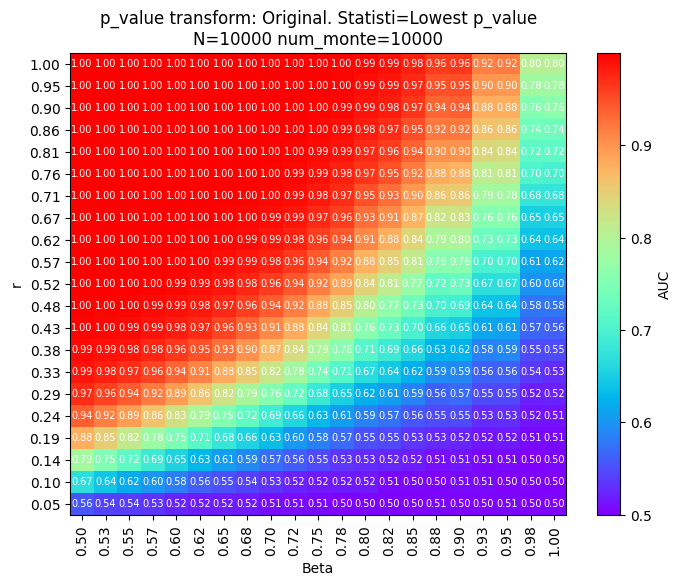

Processing higher_criticism: 100%|██████████| 442/442 [08:10<00:00,  1.11s/step, Current Step=441]


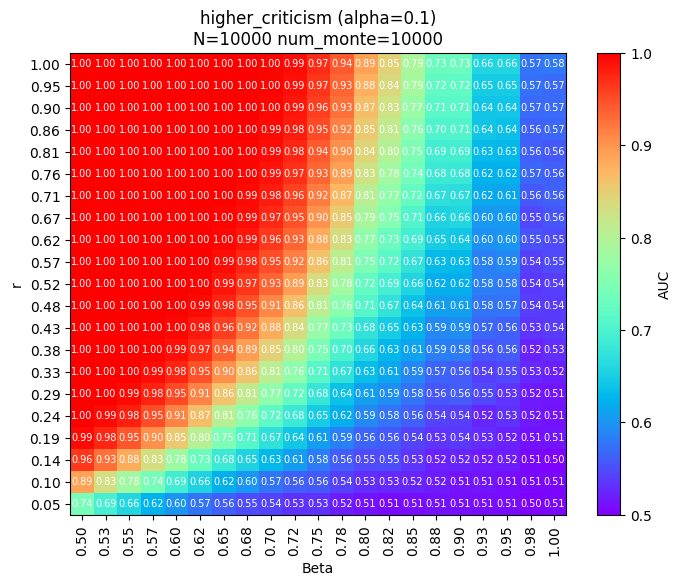

Processing higher_criticism_unstable: 100%|██████████| 442/442 [08:12<00:00,  1.12s/step, Current Step=441]


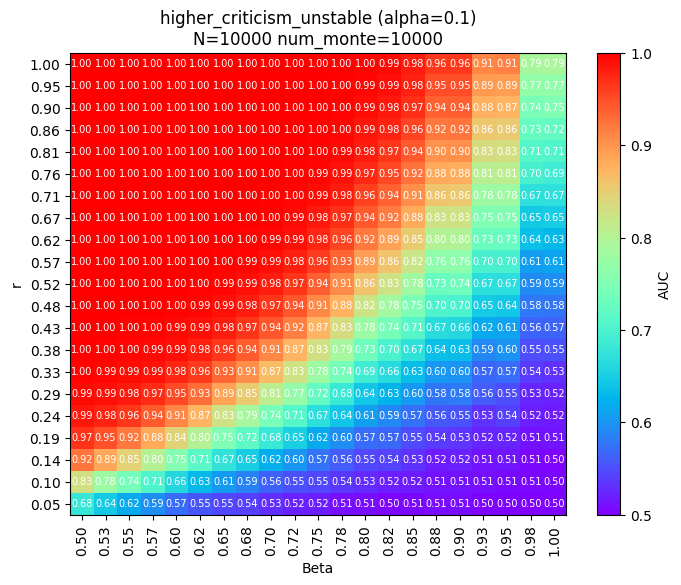

Processing berk_jones:   0%|          | 0/442 [00:00<?, ?step/s, Current Step=0]d:\venv\thesis\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Processing berk_jones: 100%|██████████| 442/442 [1:26:08<00:00, 11.69s/step, Current Step=441]


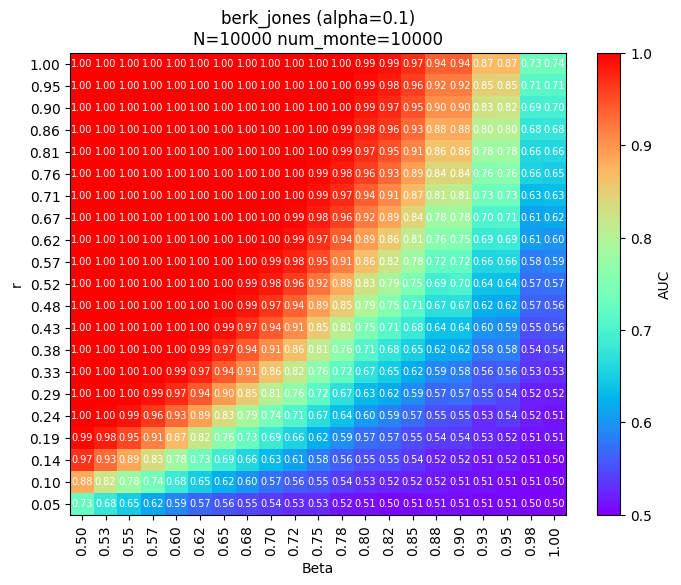

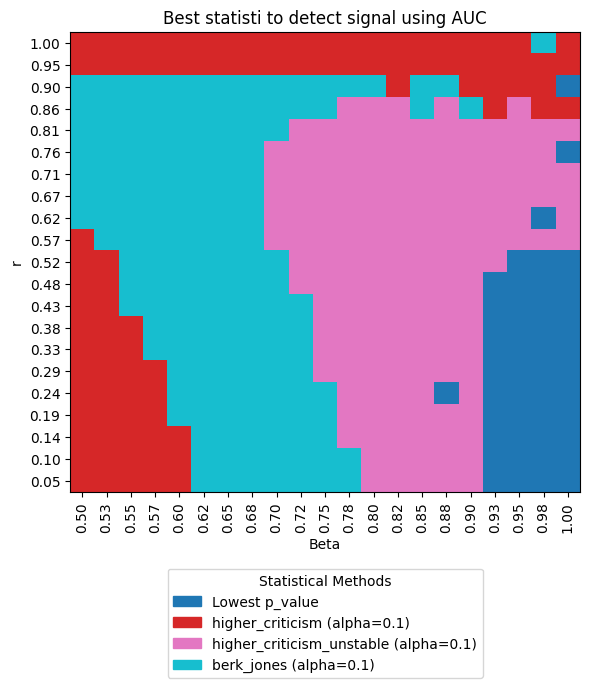

In [5]:
multi_heatmap_auc_vs_r_beta_range(r_range=r_range, beta_range=beta_range, N=N, num_monte=num_monte,\
                                  recipe=['identity',\
                                        ('higher_criticism','',alpha),\
                                        ('higher_criticism_unstable','',alpha),\
                                        ('berk_jones','',alpha)])